# The fantastic `datetime` module
**Using Python datetime to Work With Dates and Times**

Working with dates and times is one of the biggest challenges in programming. between dealing with time zones, daylight saving time, and different written date formats, it can be tough to keep track of which days and times you’re referencing. Fortunately, the built-in Python datetime module can help you manage the complex nature of dates and times.

In this tutorial, you’ll learn:
* Why programming with dates and times is such a challenge
* Which functions are available in the Python datetime module
* How to print or read a date and time in a specific format
* How to do arithmetic with dates and times

## Dealing with timezones suck!
[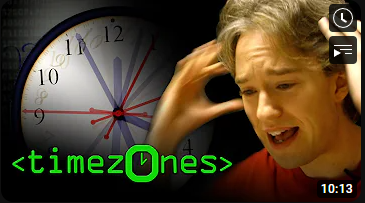](https://youtu.be/-5wpm-gesOY)

One great example of this irregularity is daylight saving time. In the United States and Canada, clocks are set forward by one hour on the second Sunday in March and set back by one hour on the first Sunday in November. However, this has only been the case since 2007. Prior to 2007, clocks were set forward on the first Sunday in April and set back on the last Sunday in October.

Things get even more complicated when you consider time zones. Ideally, time zone boundaries would follow lines of longitude exactly. However, for historical and political reasons, time zone lines are rarely straight. Often, areas that are separated by large distances find themselves in the same time zone, and adjacent areas are in different time zones. There are some time zones out there with pretty funky shapes.

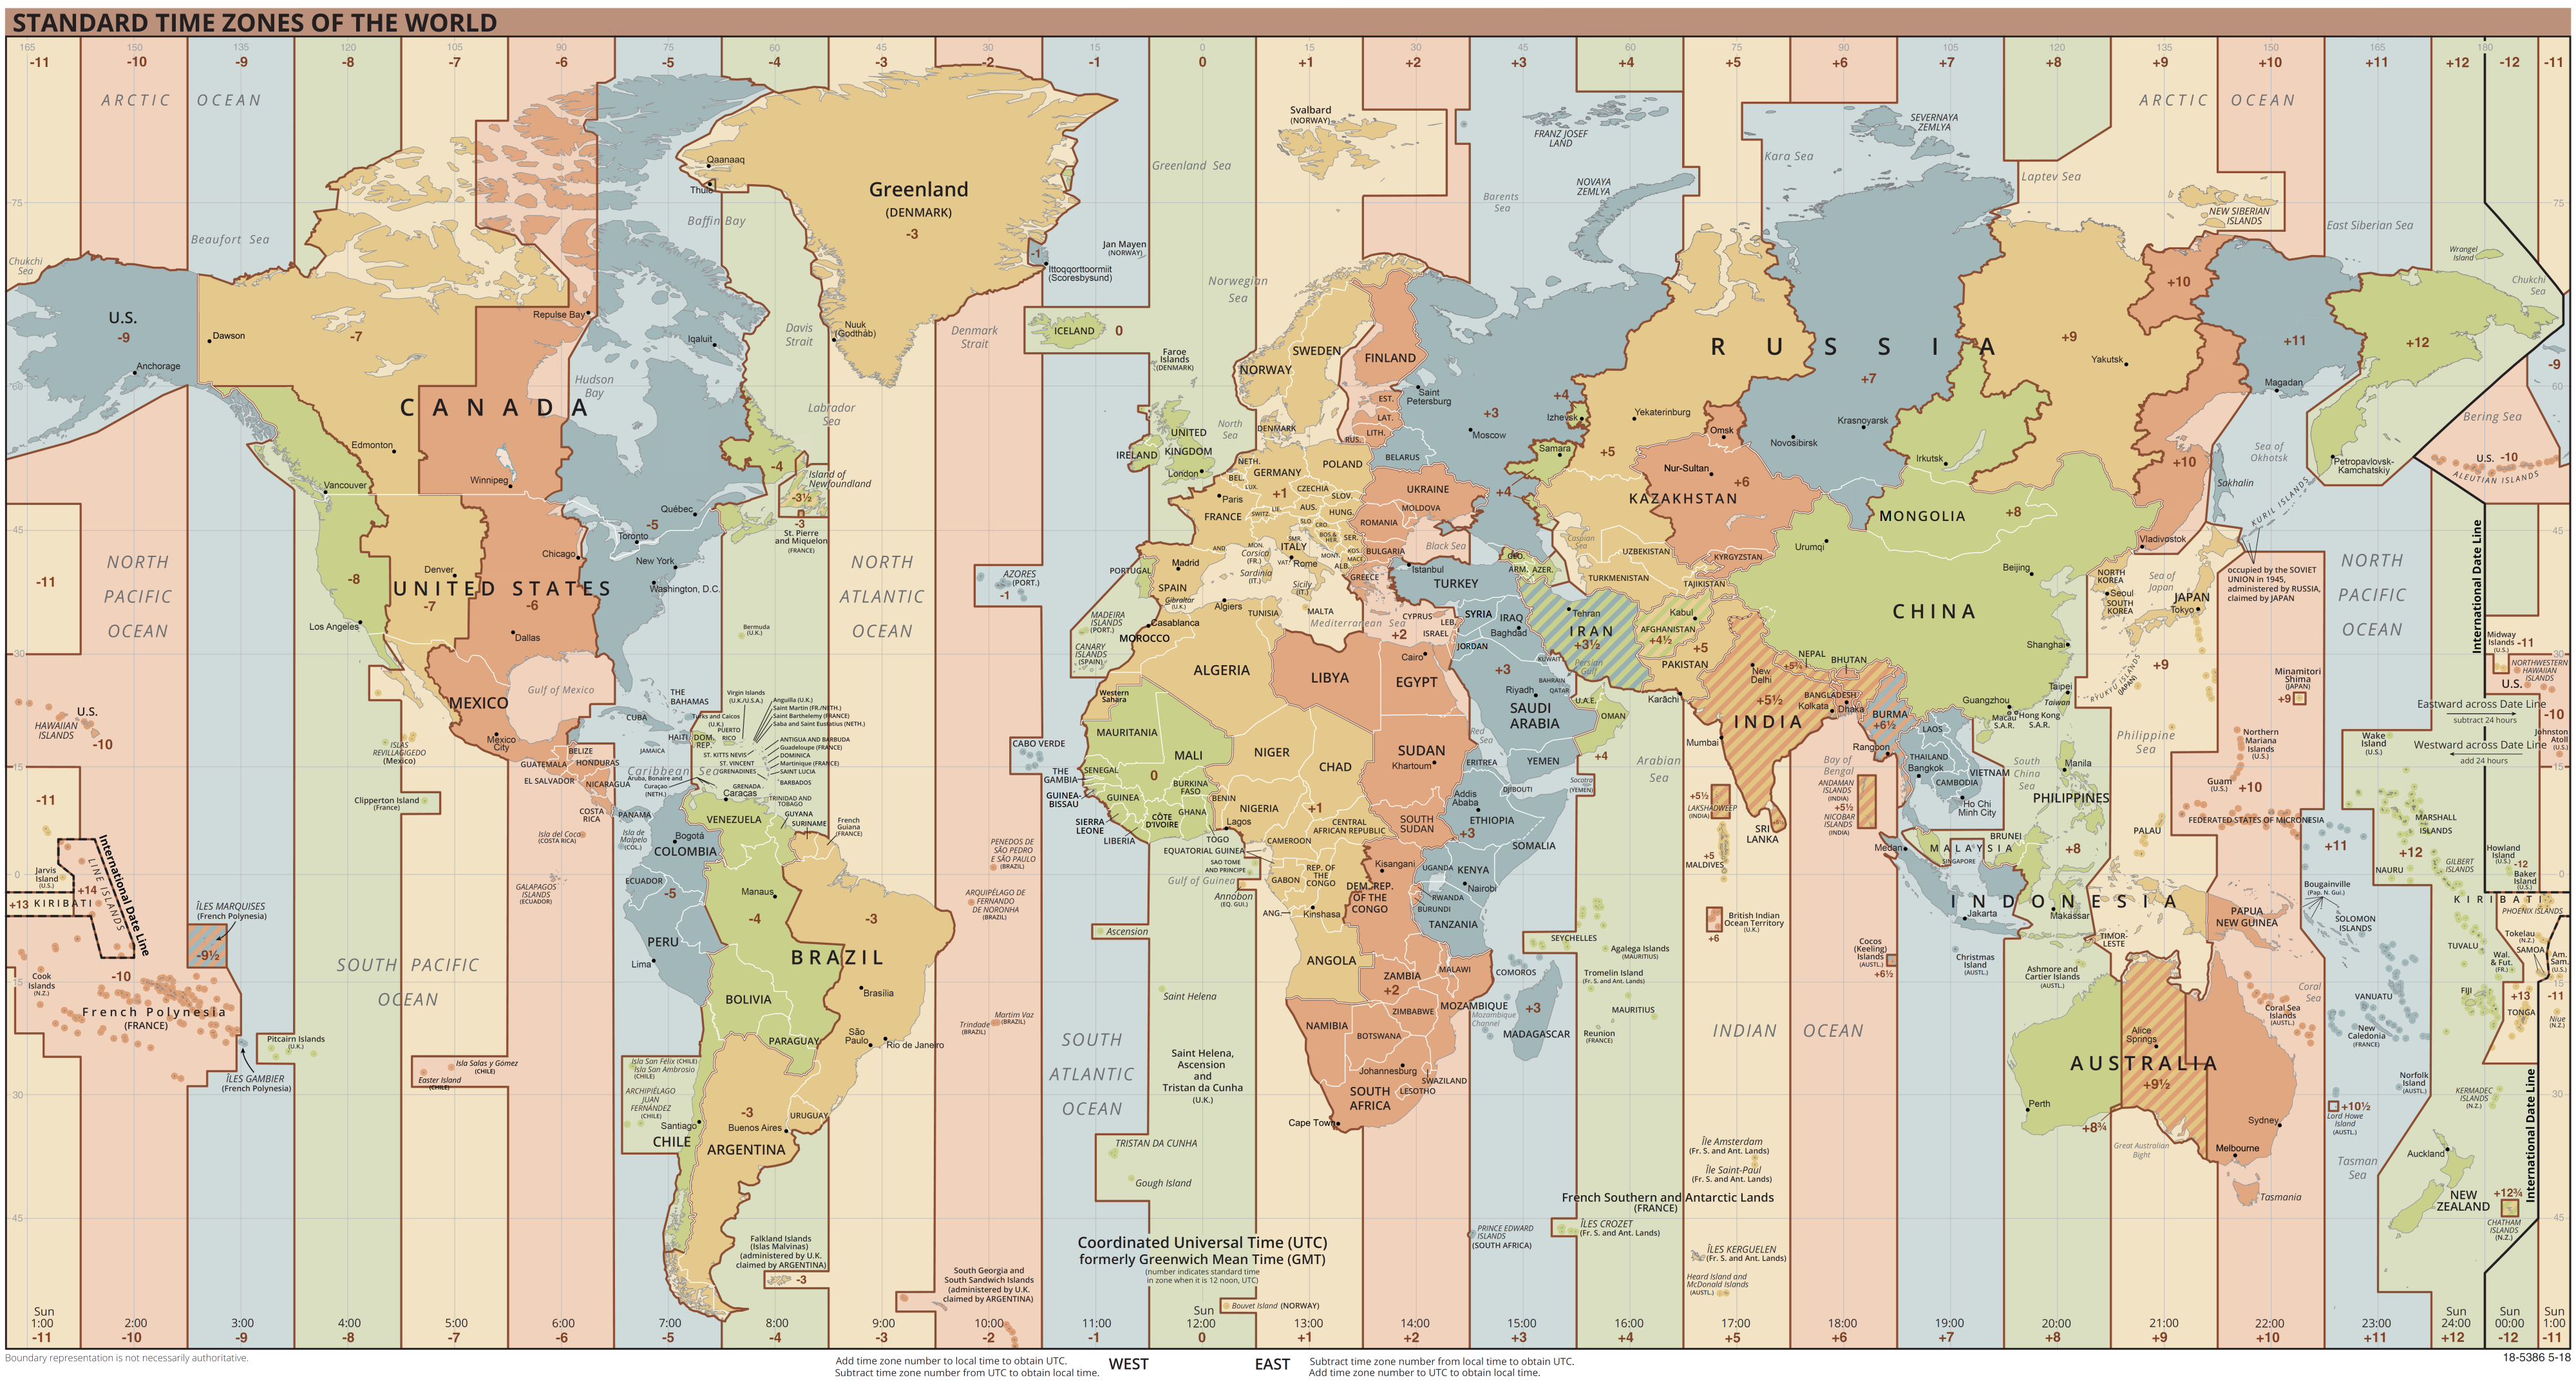

## How Computers Count Time
Nearly all computers count time from an instant called the **Unix epoch**. This occurred on January 1, 1970, at 00:00:00 UTC. UTC stands for **Coordinated Universal Time** and refers to the time at a longitude of 0°. UTC is often also called Greenwich Mean Time, or GMT. UTC is not adjusted for daylight saving time, so it consistently keeps twenty-four hours in every day.

By definition, Unix time elapses at the same rate as UTC, so a one-second step in UTC corresponds to a one-second step in Unix time. You can usually figure out the date and time in UTC of any given instant since January 1, 1970, by counting the number of seconds since the Unix epoch, with the exception of **leap seconds**. Leap seconds are occasionally added to UTC to account for the slowing of the Earth’s rotation but are not added to Unix time.

[How does python deal with leap seconds.](https://stackoverflow.com/a/39686629)

**Note:** There’s an interesting bug associated with Unix time. Since many older operating systems are 32-bit, they store the Unix time in a 32-bit signed integer.

This means that at 03:14:07 on January 19, 2038, the integer will overflow, resulting in what’s known as the Year 2038 problem, or Y2038. Similar to the Y2K problem, Y2038 will need to be corrected to avoid catastrophic consequences for critical systems.
[![image-3.png](https://upload.wikimedia.org/wikipedia/commons/e/e9/Year_2038_problem.gif)](https://en.wikipedia.org/wiki/Year_2038_problem)

Nearly all programming languages, including Python, incorporate the concept of Unix time. Python’s standard library includes a module called time that can print the number of seconds since the Unix epoch:

In [1]:
import time

# print the Unix time, or number of seconds
# (excluding leap seconds)
# since the epoch.
time.time()

1673523431.7697659

Unix time is nearly impossible for a human to parse. Instead, Unix time is typically converted to UTC, which can then be converted into a local time using time zone offsets.

To help avoid communication mistakes, the International Organization for Standardization (ISO) developed ISO 8601. This standard specifies that all dates should be written in order of most-to-least-significant data. This means the format is year, month, day, hour, minute, and second: `YYYY-MM-DD HH:MM:SS`

## How Time Should Be Stored in Your Program?

If you watch the computerphile video above, you know why you SHOULD NOT try to store time and date information manually in your programs. You should store date and time data as python's `datetime` module's objects.

### Enter the Python `datetime` Module!

As you can see, working with dates and times in programming can be complicated. Fortunately, you rarely need to implement complicated features from scratch these days since many open-source libraries are available to help out. This is definitely the case in Python, which includes three separate modules in the standard library to work with dates and times:
1. **`calendar`** outputs calendars and provides functions using an idealized Gregorian calendar.
2. **`datetime`** supplies classes for manipulating dates and times.
3. **`time`** provides time-related functions where dates are not needed.

We will focus on using the Python **`datetime`** module. The main focus of `datetime` is to make it less complicated to access attributes of the object related to dates, times, and time zones. Since these objects are so useful, `calendar` also returns instances of classes from `datetime`.

`time` is less powerful and more complicated to use than `datetime`.

`datetime` provides three classes that make up the high-level interface that most people will use:
1. **`datetime.date`** is an idealized date that assumes the Gregorian calendar extends infinitely into the future and past. This object stores the year, month, and day as attributes.
2. **`datetime.time`** is an idealized time that assumes there are 86,400 seconds per day with no leap seconds. This object stores the hour, minute, second, microsecond, and tzinfo (time zone information).
3. **`datetime.datetime`** is a combination of a date and a time. It has all the attributes of both classes.

### Creating Python datetime Instances
The three classes that represent dates and times in datetime have similar initializers. They can be instantiated by passing keyword arguments for each of the attributes, such as year, date, or hour. You can try the code below to get a sense of how each object is created:

In [3]:
from datetime import date, time, datetime
date(year=2020, month=1, day=31)

datetime.date(2020, 1, 31)

In [4]:
time(hour=13, minute=14, second=31)

datetime.time(13, 14, 31)

In [5]:
datetime(year=2020, month=1, day=31, hour=13, minute=14, second=31)

datetime.datetime(2020, 1, 31, 13, 14, 31)

`datetime` provides several other convenient ways to create datetime instances. These methods don’t require you to use integers to specify each attribute, but instead allow you to use some other information:

* `date.today()` creates a datetime.date instance with the current local date.
* `datetime.now()` creates a datetime.datetime instance with the current local date and time.
* `datetime.combine()` combines instances of datetime.date and datetime.time into a single datetime.datetime instance.

In [6]:
from datetime import date, time, datetime
today = date.today()
today

datetime.date(2023, 1, 6)

In [7]:
now = datetime.now()
now

datetime.datetime(2023, 1, 6, 10, 28, 11, 615504)

In [8]:
current_time = time(now.hour, now.minute, now.second)
datetime.combine(today, current_time)

datetime.datetime(2023, 1, 6, 10, 28, 11)

### Using Strings to Create Python datetime Instances
Python datetime provides a method called `.strptime()` to handle this situation. This method uses a special **mini-language** to tell Python which parts of the string are associated with the datetime attributes.

To construct a datetime from a string using .strptime(), you have to tell Python what each of the parts of the string represents using formatting codes from the mini-language. You can try this example to see how .strptime() works:

In [9]:
date_string = "01-31-2020 14:45:37"
format_string = "%m-%d-%Y %H:%M:%S"

datetime.strptime(date_string, format_string)

datetime.datetime(2020, 1, 31, 14, 45, 37)

On **line 1**, you create `date_string`, which represents the date and time January 31, 2020, at 2:45:37 PM. On **line 2**, you create `format_string`, which uses the mini-language to specify how the parts of date_string will be turned into datetime attributes.

In format_string, you include several formatting codes and all of the dashes (-), colons (:), and spaces exactly as they appear in date_string. To process the date and time in date_string, you include the following formatting codes:

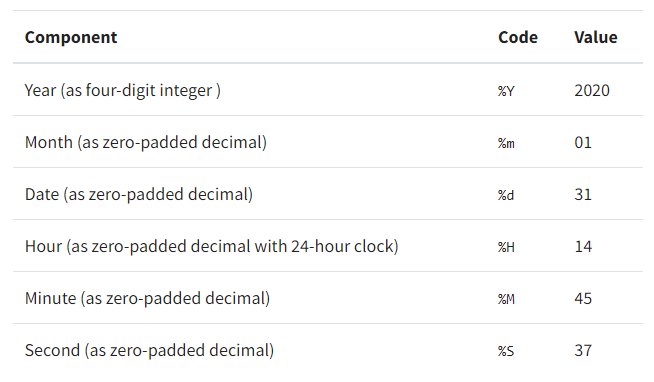

[strftime cheatsheet](https://strftime.org/)

After defining the date_string and format_string, you can use them to create a datetime instance in **line 3**.

In [14]:
bday_str = input("Enter Birthday (YYYY-MM-DD):")
format_string = "%Y-%m-%d"

print(datetime.strptime(bday_str, format_string))

Enter Birthday (YYYY-MM-DD):1995-02-20
1995-02-20 00:00:00


In [8]:
import datetime
print(tuple(dir(datetime.datetime)))

('__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year')


In [10]:
now = datetime.datetime.now()
now

datetime.datetime(2023, 1, 12, 8, 10, 22, 658216)

In [13]:
help(datetime.datetime.tzname)

Help on method_descriptor:

tzname(...)
    Return self.tzinfo.tzname(self).



In [19]:
now.weekday()

3

In [20]:
now.isoweekday()

4

In [21]:
now.date()

datetime.date(2023, 1, 12)

In [47]:
from datetime import timedelta

two_days = timedelta(days=2)
print(now-two_days)

one_week = timedelta(days=7)

one_and_half_hour = timedelta(hours=1, minutes=30)
print(now-one_and_half_hour)

2023-01-10 08:10:22.658216
2023-01-12 06:40:22.658216


### How to look up documentation on any given function!

#### Method 1: Use `help()` and `dir()` funtions
You can call `dir` on any object (such as variables or functions)
Example: calling `dir('hello')` gives you all the methods you can call on the string `hello`. Output looks like this:
`capitalize, casefold, center, count, encode, endswith, expandtabs, find, format, format_map, index, isalnum, isalpha, isascii, isdecimal, isdigit, isidentifier, islower, isnumeric, isprintable, isspace, istitle, isupper, join, ljust, lower, lstrip, maketrans, partition, removeprefix, removesuffix, replace, rfind, rindex, rjust, rpartition, rsplit, rstrip, split, splitlines, startswith, strip, swapcase, title, translate, upper, zfill`

Next, call `help()` on any of these methods. **Note:** do not call the method here as that will show help on whatever the said method returns.

Example: `print(help('hello'.title))` outputs the following:
```
Help on built-in function title:

title() method of builtins.str instance
    Return a version of the string where each word is titlecased.
    
    More specifically, words start with uppercased characters and all remaining
    cased characters have lower case.
```
#### Method 2: Use official python documentation

Use the python official documentation website to find the most comprehensive and reliable information about any feature of the language: https://docs.python.org/3.11/

To find info on the same title function, you can see [this](https://docs.python.org/3/library/stdtypes.html?highlight=str#string-methods) link.

#### Method 3: WWW or the wild wild west

This can be the most effective way of finding information but you should be very cautious since the problem is you dont know if the source is reliable or the information is up to date. So testing your code and making sure you understand how it works is very important.


In [51]:
help('hello'.title)

Help on built-in function title:

title() method of builtins.str instance
    Return a version of the string where each word is titlecased.
    
    More specifically, words start with uppercased characters and all remaining
    cased characters have lower case.



## Question:

1. Ask the user to enter their birthdate in the format: `MM*YYYY!DD`
2. Next, print which day (Monday/Tuesday etc.) they were born. (Find the information in the documentation and link the source as a comment in your code)
3. Using a `timedelta` object where the year = 1, print for each year since they were born, what was the day of week.

# Woring with TimeZones

The third party library `pytz` allows us to work with timezones easily. Lets install this library and explore it further.

**Since this is not part of the standard python distribution, we need to install it in our virtual env**. This can be done and managed in the PyCharm IDE or any other IDE you might be using.

Import and start exploring



In [65]:
import pytz

print(dir(pytz))

['AmbiguousTimeError', 'BaseTzInfo', 'FixedOffset', 'HOUR', 'InvalidTimeError', 'LazyDict', 'LazyList', 'LazySet', 'NonExistentTimeError', 'OLSEN_VERSION', 'OLSON_VERSION', 'UTC', 'UnknownTimeZoneError', 'VERSION', 'ZERO', '_CountryNameDict', '_CountryTimezoneDict', '_FixedOffset', '_UTC', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_all_timezones_lower_to_standard', '_all_timezones_unchecked', '_case_insensitive_zone_lookup', '_p', '_test', '_tzinfo_cache', '_unmunge_zone', 'all_timezones', 'all_timezones_set', 'ascii', 'build_tzinfo', 'common_timezones', 'common_timezones_set', 'country_names', 'country_timezones', 'datetime', 'exceptions', 'lazy', 'open_resource', 'os', 'resource_exists', 'sys', 'timezone', 'tzfile', 'tzinfo', 'unicode', 'unpickler', 'utc']


**following line prints all supported timezones!!!**

`print(pytz.all_timezones)`

The Canadian ones are: `'Canada/Atlantic', 'Canada/Central', 'Canada/Eastern', 'Canada/Mountain', 'Canada/Newfoundland', 'Canada/Pacific', 'Canada/Saskatchewan', 'Canada/Yukon'`

In [79]:
first_snow_day_2023 = datetime.datetime(year=2023, month=1, day=10, hour=10, minute=30, second=15, tzinfo=pytz.timezone('Canada/Newfoundland'))
print(first_snow_day_2023)

2023-01-10 10:30:15-03:31


In [83]:
IST = pytz.timezone('Asia/Kolkata')
snow_day_in_indian_time = first_snow_day_2023.astimezone(IST)
print(snow_day_in_indian_time)

2023-01-10 19:31:15+05:30


# How to pretty-print date time stuff (use `strftime`)

`print(first_snow_day_2023)` prints the following:

`datetime.datetime(2023, 1, 10, 10, 30, 15, tzinfo=<DstTzInfo 'Canada/Newfoundland' LMT-1 day, 20:29:00 STD>)`

The numbers can be hard to read. Lets use `strftime`

* `first_snow_day_2023.strftime('%B %d, %Y')` prints: `'January 10, 2023'`
* `first_snow_day_2023.strftime('%A, %B %d, %y')` prints: `'Tuesday, January 10, 23'`
* `first_snow_day_2023.strftime('%c')` prints: `'Tue Jan 10 10:30:15 2023'`

* `strftime` [cheatsheet](https://strftime.org/) contains all the codes
* A great tutorial on datetime: https://youtu.be/eirjjyP2qcQ
* Credit: https://realpython.com/python-datetime/

### Practice Questions

1. Write a program which allows the user to convert a datetime into any timezone
2. Write a program which allows the user to add or subtract any amount of time.